The best month for sales was 12 with earnings of $4,613,443.34


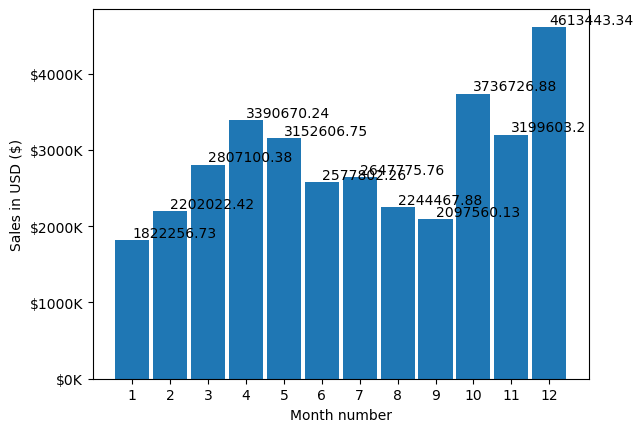

The city with the highest number of sales was  San Francisco, with a total sales of 8262203.91


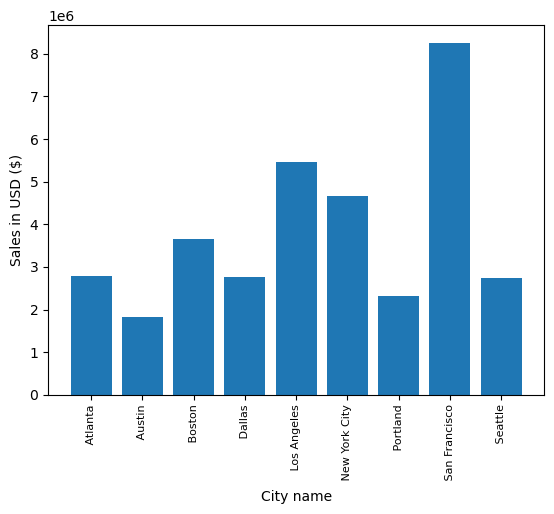

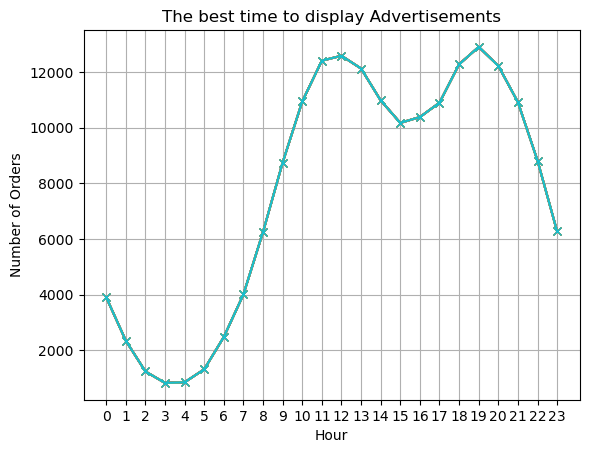

The best time to display advertisements is at 19:00
Top 5 products sold together:
('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
Top 5 products sold together:


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from itertools import combinations
from collections import Counter

# Merge all the files
folder = "C:\\Users\\Desktop\\Sales_Data"
all_files = [file for file in os.listdir(folder) if file.startswith('Sales_')]
all_data = pd.concat((pd.read_csv(f"{folder}\\{file}") for file in all_files))
all_data.to_csv("All_data.csv", index=False)

# Add a 'Month' column
all_data['Month'] = all_data['Order Date'].str[0:2]  #all_data['Month'] = all_data['Order Date'].dt.month

# Clean the data
all_data = all_data.dropna(how='all')
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data = all_data[all_data['Month'].str[0:2] != 'Na']

# Convert 'Month' column to int
all_data['Month'] = all_data['Month'].astype('int32')

# Convert columns to correct type
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

# Add a 'Sales' column
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

# Add a 'City' column
# def get_city(address):
#     return address.split(",")[1].strip(" ")

# def get_state(address):
#     return address.split(",")[2].split(" ")[1]

#all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])

# What was the best month for sales? How much was earned that month?
monthly_sales = all_data.groupby('Month').sum(numeric_only=True)
best_month = monthly_sales['Sales'].idxmax()  # This will give you the month with the highest sales
best_month_sales = monthly_sales['Sales'].max()  # This will give you the highest sales

print(f"The best month for sales was {best_month} with earnings of ${best_month_sales:,.2f}")

# months = range(1, 13)
# plt.bar(months, monthly_sales['Sales'])
# plt.xticks(months)
# plt.ylabel('Sales in USD ($)')
# plt.xlabel('Month number')
# plt.show()
months = range(1, 13)

fig, ax = plt.subplots()

# Create the bar chart
bars = ax.bar(months, monthly_sales['Sales'], width=0.9)

# Create a function to format the y-axis labels as currency
def currency(x, pos):
    'The two args are the value and tick position'
    return '${:1.0f}K'.format(x*1e-3)

formatter = FuncFormatter(currency)

# Set the formatter for the y-axis
ax.yaxis.set_major_formatter(formatter)

plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # va: vertical alignment
plt.show()

# What city had the highest number of sales?
city_sales = all_data.groupby('City').sum(numeric_only=True)
best_city = city_sales['Sales'].idxmax()
best_city_sales = city_sales['Sales'].max()
print(f'The city with the highest number of sales was {best_city}, with a total sales of {best_city_sales}')

monthly_sales = all_data.groupby('City').sum(numeric_only=True)
cities = [city for city, df in all_data.groupby('City')]
plt.bar(cities, monthly_sales['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')
plt.show()
# What time should we display advertisements to maximize the chance of customers buying products?
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'],infer_datetime_format=True)
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count(), marker='x',markersize=6)
plt.title('The best time to display Advertisements')
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()
max_orders_hour = all_data.groupby(['Hour']).count().idxmax()['Order Date']
print(f'The best time to display advertisements is at {max_orders_hour}:00')

# What products are most often sold together?
print("Top 5 products sold together:")
df = all_data[all_data['Order ID'].duplicated(keep=False)].copy()
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
#df.loc[:, 'Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
for key, value in count.most_common(5):
    print(key, value)
print("Top 5 products sold together:")


The city with the highest number of sales was  San Francisco, with a total sales of 8262203.91


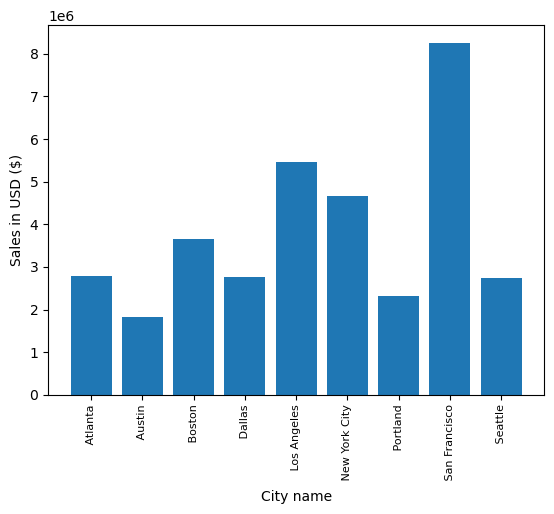

In [5]:
# What city had the highest number of sales?
city_sales = all_data.groupby('City').sum(numeric_only=True)
best_city = city_sales['Sales'].idxmax()
best_city_sales = city_sales['Sales'].max()
print(f'The city with the highest number of sales was {best_city}, with a total sales of {best_city_sales}')

monthly_sales = all_data.groupby('City').sum(numeric_only=True)
cities = [city for city, df in all_data.groupby('City')]
plt.bar(cities, monthly_sales['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')
plt.show()

In [7]:
# What products are most often sold together?
print("Top 5 products sold together:")
df = all_data[all_data['Order ID'].duplicated(keep=False)].copy()
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
#df.loc[:, 'Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
for key, value in count.most_common(5):
    print(key, value)
print("Top 5 products sold together:")


Top 5 products sold together:
('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
Top 5 products sold together:
